# Ridge vs Lasso Regression

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_csv("dataset/diabetes_clean.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X = dataset.drop("glucose",axis=1).values
y = dataset["glucose"].values

### Add Ridge and Lasso Params

In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge_params = {"alpha": [0.1,1,10,100,1000]}
lasso_params = {"alpha": [0.1,1,10,100,1000]}

### GridSearchCV for Ridge Regression

In [13]:
ridge = Ridge()
ridge_search = GridSearchCV(ridge,ridge_params, cv=5)
ridge_search.fit(X,y)
print("Ridge Best Parameter:", ridge_search.best_params_)

Ridge Best Parameter: {'alpha': 1}


### GridSearchCV for Lasso Regression

In [14]:
lasso = Lasso()
lasso_search = GridSearchCV(lasso, lasso_params, cv=5)
lasso_search.fit(X,y)
print("Lasso Best Parameter:",lasso_search.best_params_)

Lasso Best Parameter: {'alpha': 0.1}


### Best Ridge Model Coefs

In [19]:
best_ridge_model = ridge_search.best_estimator_
ridge_coef = best_ridge_model.coef_

### Best Lasso Model Coefs

In [20]:
best_lasso_model = lasso_search.best_estimator_
lasso_coef = best_lasso_model.coef_

### Creating DataFrame for Comparison

In [24]:
names = dataset.drop("glucose",axis=1).columns
coefs_df = pd.DataFrame({
    "Column Name": names,
    "Ridge Coefs": ridge_coef,
    "Lasso Coefs": lasso_coef
})
coefs_df

,Column Name,Ridge Coefs,Lasso Coefs
0,pregnancies,-0.461839,-0.447446
1,diastolic,0.117698,0.116629
2,triceps,-0.288833,-0.286273
3,insulin,0.090184,0.090614
4,bmi,0.310577,0.316197
5,dpf,1.703777,0.814904
6,age,0.485121,0.486415
7,diabetes,24.865994,24.601176


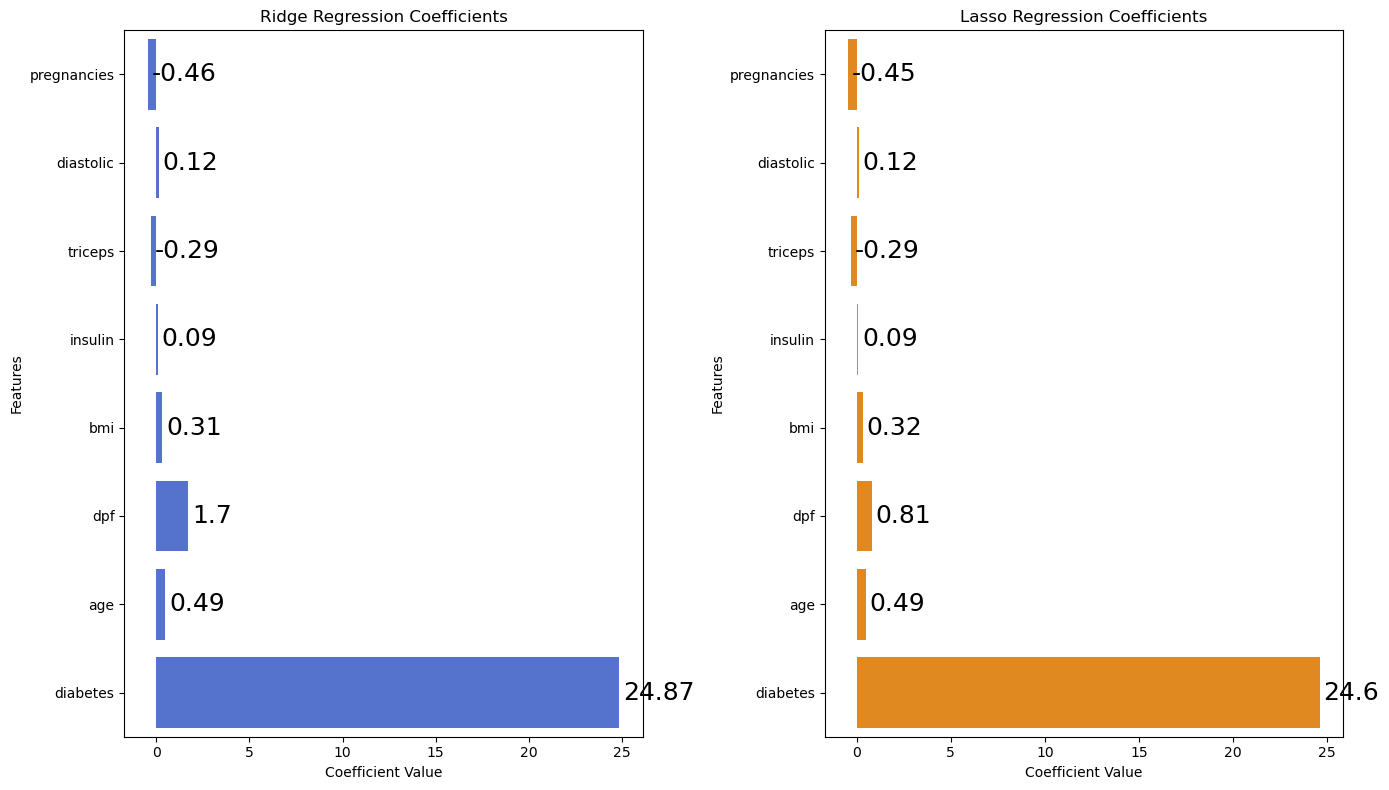

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust figure size
plt.figure(figsize=(14, 8))

# Ridge Coefficients Visualization
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x='Ridge Coefs', y='Column Name', data=coefs_df, color='royalblue')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Add coefficient values on top of the bars
for i in range(len(coefs_df)):
    ax1.text(coefs_df['Ridge Coefs'][i] + 0.2, i, round(coefs_df['Ridge Coefs'][i], 2), 
             color='black', ha="left", va="center", fontsize=18)

# Lasso Coefficients Visualization
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Lasso Coefs', y='Column Name', data=coefs_df, color='darkorange')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

# Add coefficient values on top of the bars
for i in range(len(coefs_df)):
    ax2.text(coefs_df['Lasso Coefs'][i] + 0.2, i, round(coefs_df['Lasso Coefs'][i], 2), 
             color='black', ha="left", va="center", fontsize=18)

# Adjust layout for proper display
plt.tight_layout()
plt.savefig("results/RvsL.png")
plt.show()
